In [1]:
import lib_metro as metro

import pandas as pd
import osmnx as ox
import networkx as nx
from staticmap import StaticMap, CircleMarker, Line
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Optional, TextIO, List, Tuple, Dict, TypeAlias
import pickle as pkl

In [2]:
CityGraph : TypeAlias = nx.Graph
OsmnxGraph : TypeAlias = nx.MultiDiGraph

Point = Tuple[int, int]
MetroGraph: TypeAlias = nx.Graph

In [28]:
def get_osmnx_graph() -> OsmnxGraph:
    graph = ox.graph_from_place("Barcelona", network_type='walk', simplify=True)
       
    for u, v, key, geom in graph.edges(data = "geometry", keys = True):
        if geom is not None:
            del(graph[u][v][key]["geometry"])
    x = nx.get_node_attributes(graph,"x")
    y = nx.get_node_attributes(graph,"y")
    pos = dict()
    for key in x.keys():
        pos[key]=(x[key],y[key])
    nx.set_node_attributes(graph,pos)
    return graph

In [29]:
def save_osmnx_graph(g: OsmnxGraph, filename: str) -> None: 
    pickle_out = open(filename,"wb")
    pkl.dump(g,pickle_out)
    pickle_out.close()
    
def load_osmnx_graph(filename: str) -> OsmnxGraph: 
    pickle_in = open(filename,"rb")
    return pkl.load(pickle_in)
    

In [55]:
def build_city_graph(g1: OsmnxGraph, g2: MetroGraph) -> CityGraph:  
    nodes = []
    X=[]
    Y=[]
    for node in g2.nodes():
        value = g2.nodes[node]
        if value["type"]=="access":
            coords = value["pos"]
            X.append(coords[0])
            Y.append(coords[1])
            nodes.append(node)
    nearest,distances = ox.distance.nearest_nodes(g1,X,Y,return_dist=True)
    city = nx.union(nx.Graph(g1),g2)
    #AQUI TEMA VELOCITAT
    city.add_edges_from(zip(nearest,nodes),distance=distances)
    return city

In [46]:
c

In [7]:
g2 = metro.get_metro_graph()
g1=load_osmnx_graph("barcelona.pickle")


In [56]:
city=build_city_graph(g1,g2)


In [57]:
nx.draw(city)


KeyboardInterrupt



Error in callback <function flush_figures at 0x7efd4a90eb90> (for post_execute):


KeyboardInterrupt: 

In [9]:
ox.nearest_nodes(g,g2.nodes[121]["pos"][0],g2.nodes[121]["pos"][1])

NameError: name 'g' is not defined

In [93]:
g2.nodes[121]

{'pos': (2.1432912673316498, 41.37525362810128), 'type': 'station'}

In [20]:
graph = load_osmnx_graph("barcelona.pickle")

In [21]:
x = nx.get_node_attributes(graph,"x")
y = nx.get_node_attributes(graph,"y")
pos = dict()
for key in x.keys():
    pos[key]=(x[key],y[key])
nx.set_node_attributes(graph,pos,"pos")
graph=nx.Graph(graph)

In [22]:
G=nx.union(graph,g2)

TypeError: OutEdgeView.__call__() got an unexpected keyword argument 'keys'

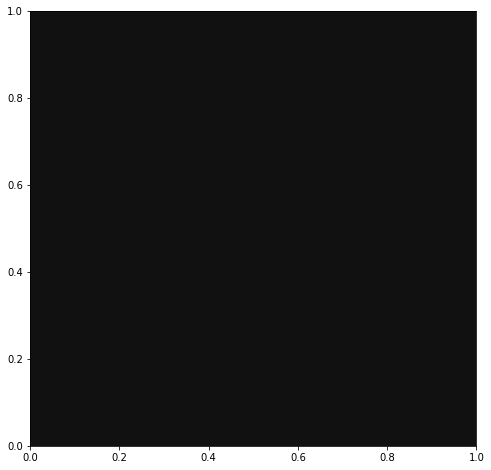

In [27]:
ox.plot_graph(nx.DiGraph(graph))